In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Stores.csv")

In [3]:
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [4]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

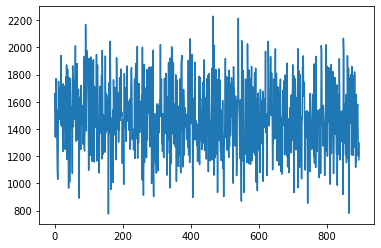

In [5]:
plt.plot(df['Store_Area'])

In [6]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


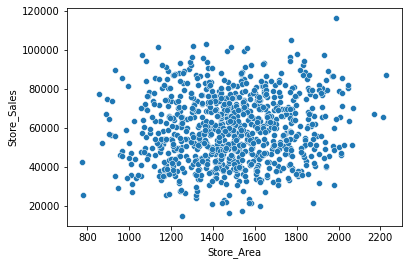

In [7]:
sns.scatterplot(x=df['Store_Area'], y=df['Store_Sales'], data=df);

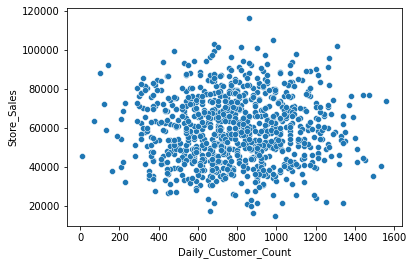

In [8]:
sns.scatterplot(x=df['Daily_Customer_Count'], y=df['Store_Sales'], data=df);

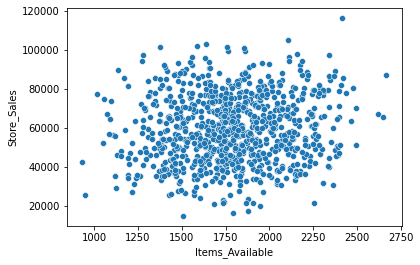

In [9]:
sns.scatterplot(x=df['Items_Available'], y=df['Store_Sales'], data=df);

In [10]:
features_list=df.columns[1:-1]
features_list

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count'], dtype='object')

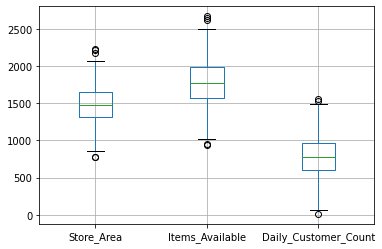

In [11]:
df[features_list].boxplot();

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[features_list]=scaler.fit_transform(df[features_list])
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,0.607978,0.593084,0.335484,66490
1,2,0.471802,0.472622,0.129032,39820
2,3,0.388583,0.390202,0.458065,54010
3,4,0.464924,0.470317,0.393548,53730
4,5,0.684319,0.679539,0.283871,46620
...,...,...,...,...,...
891,892,0.555021,0.563689,0.690323,66390
892,893,0.420908,0.421326,0.541935,82080
893,894,0.292297,0.290490,0.677419,76440
894,895,0.360385,0.361960,0.490323,96610


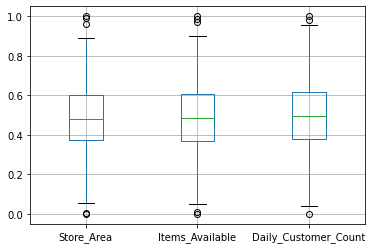

In [13]:
df[features_list].boxplot();

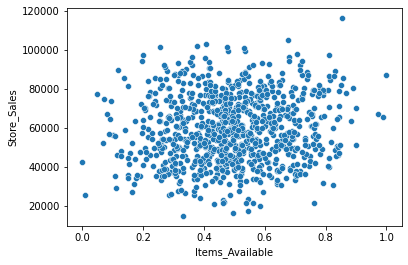

In [14]:
sns.scatterplot(x=df['Items_Available'], y=df['Store_Sales'], data=df);

<AxesSubplot:>

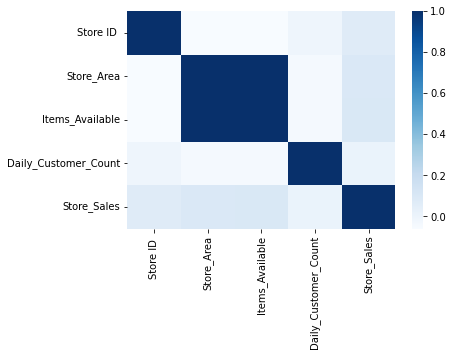

In [15]:
df_corr=df.corr()
sns.heatmap(df_corr, cmap='Blues')

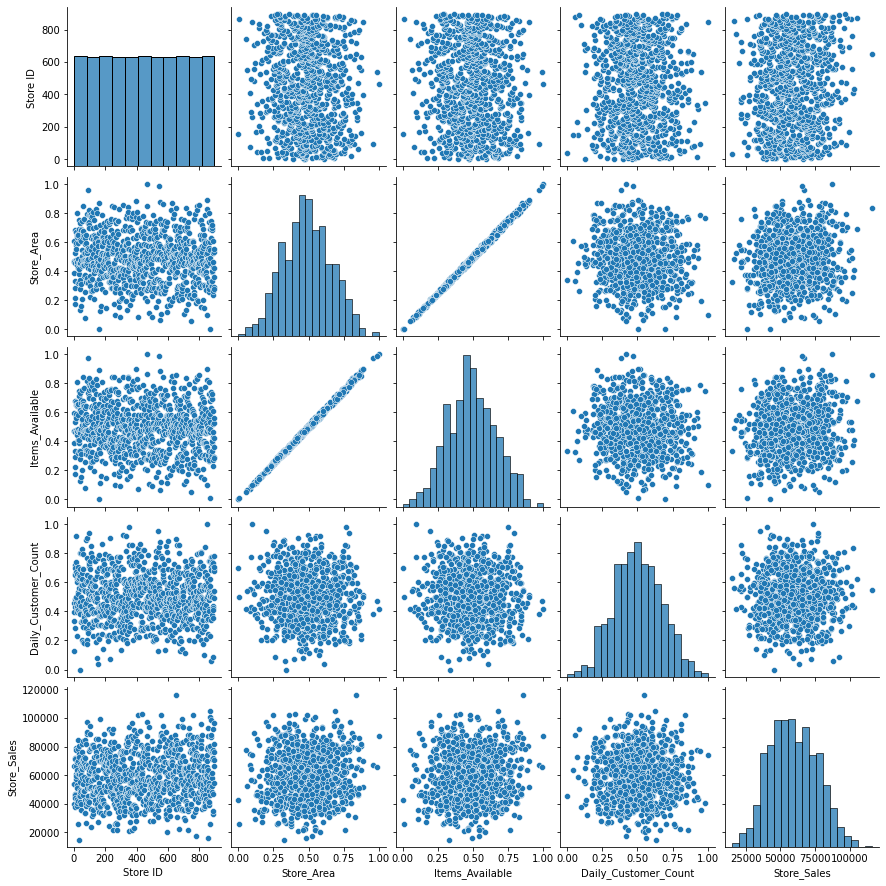

In [16]:
sns.pairplot(df);

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df[features_list]
y=df['Store_Sales']
Xtrain,Xtest,ytrain, ytest = train_test_split(X,y,test_size=0.3)

model=LinearRegression()
model.fit(Xtrain,ytrain)
y_pred=model.predict(Xtest)



In [19]:
error=y_pred - ytest
MAE=np.mean(abs(error))
MAE

13439.208503325073

In [21]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model, Xtest,ytest, cv=8)
cv_score.mean()

#poor score

-0.03176049390746763

In [26]:
#try solvers
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate

lin_sl_sgd= SGDRegressor(loss="squared_loss")
cv_score_sgd = cross_validate(lin_sl_sgd, X,y,cv=10, \
    scoring=['max_error','r2','neg_mean_absolute_error','neg_mean_squared_error'])


abs(cv_score_sgd['test_neg_mean_absolute_error'].mean())


/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient

14130.676668793652

In [27]:
mae_sgd= SGDRegressor(loss="epsilon_insensitive", epsilon = 0)

cv_mae_sgd = cross_validate(lin_sl_sgd, X,y,cv=10, \
    scoring=['max_error','r2','neg_mean_absolute_error','neg_mean_squared_error'])


abs(cv_mae_sgd['test_neg_mean_absolute_error'].mean())

/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient

14124.876821515887

In [28]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=8)
neigh.fit(X,y)
cv_score_MAE=cross_val_score(neigh, X, y, scoring = 'neg_mean_absolute_error')
cv_score_MAE.mean()


-15041.818792675356

In [ ]:
new_store=pd.DataFrame(np.array([[1174,1429,1110]]),columns=['Store_Area', 'Items_Available', 'Daily_Customer_Count'])

In [ ]:
new_store

In [ ]:
scaled_newstore=scaler.transform(new_store)
scaled_newstore

In [ ]:
new_sales=model.predict(scaled_newstore)
new_sales